**Note to grader:** Each question (e.g., Q1-1) is assigned with 5 points. The final score  will be (sum of actual scores)/(sum of maximum scores)*100. The grading rubrics are shown in the TA guidelines.

# **Assignment 3**

The goal in this assignment to work a little more with Python, do some practice with logistic regression, reflect on how it can fail to work on linearly separable data. You will also work with a support vector classifier. All that, still on "toy" data sets.

We will work with the first 'real' data sets in the next assignment.

## **Preparation Steps**

In [1]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [2]:
# ### Reading-in the Iris data
# Iris data description: http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html#:~:text=The%20Iris%20Dataset%20contains%20four,model%20to%20classify%20the%20species.


s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


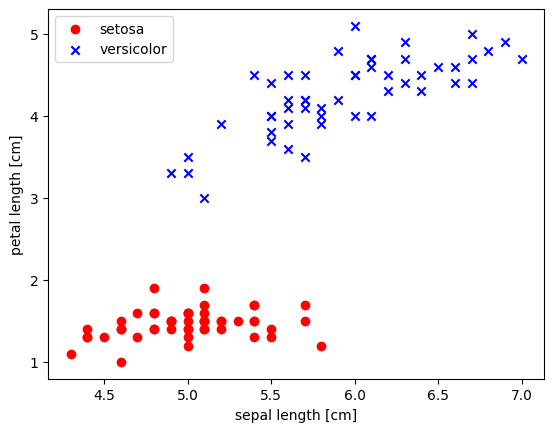

In [3]:
# select setosa and versicolor for binary classification
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [4]:
# function for visualizing decision regions

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 1. Practice with logistic regression** </font>

Let's first load the textbook's implementation of logistic regression with gradient descent.

In [5]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # compute the logistic `loss`
            # cross entropy loss
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.loss_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Below you can see the first 3 data points of the data set.

In [6]:
X[0:3], y[0:3]

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3]]),
 array([-1, -1, -1]))


Suppose the initial weights of the logistic neuron are w0=0.1, w1=-0.2, w2=0.1

<font color = 'blue'> **Q1-1**.  </font> Write the weights after processing data points 0,1,2, with learning rate $\eta=0.1$ and show your calculations. This is similar to the previous assignment, only done now for the logistic neuron. You can also use *LogisticRegressionGD* to check your calculations. <br>

<font color = 'blue'> **Q1-2**.  </font> Given our data $X$, let $X_{d=2}$ and $X_{d=3}$ be the quadratic and cubic features. Using PolynomialFeatures from sklearn.preprocessing, generate $X_{d=2}$ and $X_{d=3}$

<font color = 'blue'> **Q1-3**.  </font> Using *LogisticRegressionGD* fit $X$, $X_{d=2}$ and $X_{d=3}$. Here you should set $\eta = 10e-9$ and $n_{iter}>1000$. For each of these three cases, report the loss function value for the model computed by *LogisticRegressionGD*.
Here it is expected that the loss value decreases as $d$ increases.


You can compute the updates with code, but more manual solutions are also acceptable.

In [7]:
# change labels from -1 to 0:
# this is required in logistic regression
y = np.where(y==1,1,0)

HINTS:

---

Q1-1: You can treat the three data points as a batch and do one update for the entire batch.
Or you can use stochastic gradient descend which will look at one sample at a time.
Look at the LogisticRegressionGD.fit() function.
Define w and eta, calculate net input, calculate logistic sigmoid activation, calculate errors, then update w.

Q1-2: from sklearn.preprocessing import PolynomialFeatures

Q1-3: print fit().loss_

In [8]:
# your calculations and code go here
# Q 1-1
# -=-=-=-==-=-=-=-===--=--=--==--==-==--==-=--=-==--==-=--==-=
eta = 0.1
# Cross entropy (sig = sigma, z = logit): -[ylogsig(z)+(1-y)log(1-sig(z))]

def myCrossEntropy(sig, y):
    return -(y*np.log(sig)+(1-y)*np.log(1-sig))

#represents the gradient of the loss with respect to 
#        the weight associated with feature x

# returns gradients of loss function given weights for each term
# first item in array is bias term
def myGradientOfLossForWeights(sig,y,X:np.ndarray):
    output = []
    output.append(sig-y) # bias
    for i in range(X.size):
        output.append((sig-y)*X[i])
    return output


weights = [0,0] # initialize weights
bias = 0 # bias )

# ------------------------datapoint 1------------------------------------
# data point: (5.1, 1.4)
# weighted sum or logit function
z = np.dot(X[0], weights) + bias

# sigmoid function: 1/(1+e^(-z)) (gives probability from features)
sigmoid = 1/(1+np.e**(-z))
loss = myCrossEntropy(sigmoid, 0)
print(f"Pass 0 loss: {loss}")
gradients = myGradientOfLossForWeights(sigmoid,0,X[0])

# update weights
bias = bias - (eta * gradients[0])
weights[0] = weights[0] - (eta * gradients[1])
weights[1] = weights[1] - (eta * gradients[2])

print(f"Pass 0: Bias: {bias}\t\t\tWeight 1: {weights[0]}\t\tWeight 2: {weights[1]}")
print('\n')

#  ------------------------datapoint 2 -------------------------------
# data point: (4.9, 1.4)
z = np.dot(X[1], weights) + bias

sigmoid = 1/(1+np.e**(-z))
loss = myCrossEntropy(sigmoid, 0)
print(f"Pass 1 loss: {loss}")
gradients = myGradientOfLossForWeights(sigmoid,0,X[1])

bias = bias - (eta * gradients[0])
weights[0] = weights[0] - (eta * gradients[1])
weights[1] = weights[1] - (eta * gradients[2])

print(f"Pass 1: Bias: {bias}\tWeight 1: {weights[0]}\tWeight 2: {weights[1]}")
print('\n')

#  ------------------------datapoint 3 ------------------------------
# data point: (4.7, 1.3)
z = np.dot(X[2], weights) + bias

sigmoid = 1/(1+np.e**(-z))
loss = myCrossEntropy(sigmoid, 0)
print(f"Pass 2 loss: {loss}")
gradients = myGradientOfLossForWeights(sigmoid,0,X[2])

bias = bias - (eta * gradients[0])
weights[0] = weights[0] - (eta * gradients[1])
weights[1] = weights[1] - (eta * gradients[2])

print(f"Pass 2: Bias: {bias}\tWeight 1: {weights[0]}\tWeight 2: {weights[1]}")
print('\n')
#  -------------------------------------------------------------

#Testing out data
np.set_printoptions(precision=2)

lgr = LogisticRegressionGD()
lgr.fit(X[0:3],y[0:3])

print("Actual Bias and Weights: "+ ", ".join([str(w) for w in lgr.w_]))
print('\n')
# -=-=-=-==-=-=-=-===--=--=--==--==-==--==-=--=-==--==-=--==-=


# Q 1-2
# -=-=-=-==-=-=-=-===--=--=--==--==-==--==-=--=-==--==-=--==-=
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(2)
cubic = PolynomialFeatures(3)

Xd2 = quadratic.fit_transform(X)
Xd3 = cubic.fit_transform(X)

#print(Xd2)
# -=-=-=-==-=-=-=-===--=--=--==--==-==--==-=--=-==--==-=--==-=

# Q 1-3
# -=-=-=-==-=-=-=-===--=--=--==--==-==--==-=--=-==--==-=--==-=
# linear
linearLR = LogisticRegressionGD(eta=10e-9,n_iter=20000)
linearLR.fit(X[0:3],y[0:3])
print("Loss for linear: \t" + str(linearLR.loss_[-1]))

# quadratic
quadraticLR = LogisticRegressionGD(eta=10e-9,n_iter=20000)
quadraticLR.fit(Xd2[0:3],y[0:3])
print("Loss for quadratic: \t" + str(quadraticLR.loss_[-1]))

# cubic
cubicLR = LogisticRegressionGD(eta=10e-9,n_iter=20000)
cubicLR.fit(Xd3[0:3],y[0:3])
print("Loss for cubic: \t" + str(cubicLR.loss_[-1]))
# -=-=-=-==-=-=-=-===--=--=--==--==-==--==-=--=-==--==-=--==-=

Pass 0 loss: 0.6931471805599453
Pass 0: Bias: -0.05			Weight 1: -0.255		Weight 2: -0.06999999999999999


Pass 1 loss: 0.22091244633712154
Pass 1: Bias: -0.06982131234049277	Weight 1: -0.3521244304684145	Weight 2: -0.09774983727668986


Pass 2 loss: 0.14578005206005368
Pass 2: Bias: -0.0833865329609428	Weight 1: -0.4158809673845297	Weight 2: -0.11538462408327489


Actual Bias and Weights: -0.2077749442470596, -1.1007885832903477, -0.3106482038219482


Loss for linear: 	2.0363860387771693
Loss for quadratic: 	1.8821563806632526
Loss for cubic: 	0.29503197230041356


In [9]:
# Grader's area
maxScore = 0

# maxScore +=
# actualScore +=

-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 2. Logistic Regression: How 'unfair' can it be?**  </font>

We have seen that the inductive bias of an SVM guarantees that when the dataset is linearly separable, SVM will return a hyperplane that is at exactly the same distance from the two classes.  But what about logistic regression? Can we guarantee that it can also be at least partially fair?

The answer is **negative**. We can  demonstrate how logistic regression can be 'unfair' by constructing a dataset with the properties that: <br>

**a.** the data set is linearly separable  <br>
**b.** the optimal logistic regression model corresponds to a hyperplane that nearly 'touches' one of the two classes, i.e. it gives a very big margin to the one of the two classes and very small margin for the other class.  <br>

Demonstrate your answer as follows: <br>

<font color = 'blue'> **Q2-1**.  </font>
 Plot the data points, as we did above for the iris data set. This will show that your data set is linearly separable. <br>
<font color = 'blue'> **Q2-2**.  </font> Calculate the optimal logistic neuron weights using the function *LogisticRegressionGD* from question 1. <br>
<font color = 'blue'> **Q2-3**. </font>  Plot the decision regions to demonstrate how the learned separation line is unfair.

**Hint**: Try small datasets.
**Note**: It's best to use fresh variables for your dataset, because the previous $X,y$ are re-used in question 3.


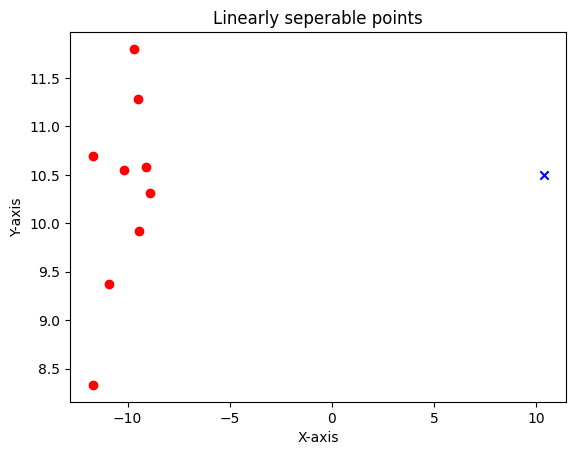

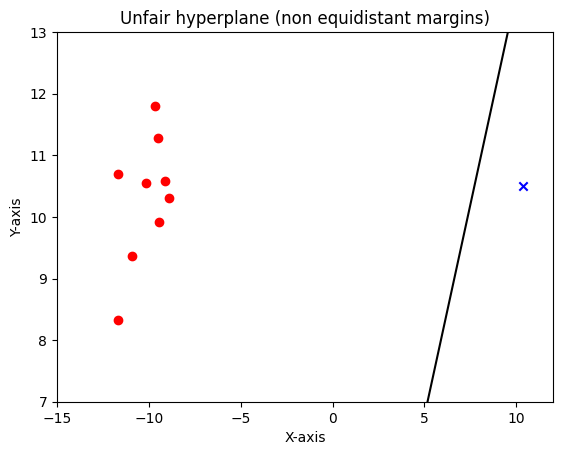

In [10]:
# your answers go here

# -------------------------- Q2-1 ----------------------------------------------------
# plot data
from sklearn.datasets import make_classification
my_X,my_y = make_classification(weights=[0.9,0.1],n_samples=10,n_features=2,
                                n_redundant=0,n_clusters_per_class=1,
                                class_sep=10,random_state=2)

def plotDatapoints():
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    for i in range(len(my_X)):
        label = my_y[i]
        
        if(label == 0):
            plt.scatter(my_X[i,0], my_X[i,1],color='red',marker='o')
        else:
            plt.scatter(my_X[i,0], my_X[i,1],color='blue',marker='x')

# plt.savefig('images/02_06.png', dpi=300)
plotDatapoints()
plt.title("Linearly seperable points")
plt.show()
# ------------------------------Q2-2--------------------------------------------------------
plotDatapoints()
logreg = LogisticRegressionGD()
my_w = logreg.fit(my_X,my_y).w_

my_b = my_w[0]
my_w1 = my_w[1]
my_w2 = my_w[2]

#--------------------------Q2-3-----------------------------------------------------

# Generate a range of x-values for visualization
x_values = np.linspace(-15, 15,15)

# Calculate the corresponding y-values using the equation of the hyperplane
y_values = (-my_w1 * x_values - my_b) / my_w2

plt.title("Unfair hyperplane (non equidistant margins)")
plt.plot(x_values, y_values, color='black')
plt.xlim(-15,12)
plt.ylim(7,13)
plt.show()

#------------------------------------------------------------------------------

In [11]:
# Create data set
epsilon = 1
n = 30
m = 2
X2 = np.array([np.array([1]*n + [1+epsilon]*m),
                  np.array(list(range(n))+list(range(m)))]).T
y2 = np.array([0]*n + [1]*m)

In [12]:
# Grader's area

# maxScore +=
# actualScore +=



<font color = 'blue'> **Q2-4**.  </font> The standard scikit-learn implementation of logistic regression uses regularization by default ($C=1$).  Can you come up with a linearly separable dataset that makes that **default** implementation fail? <br>

[Note: This is an experimental question. You should be able to use the example from above, or modify it, and make the default implementation fail.]

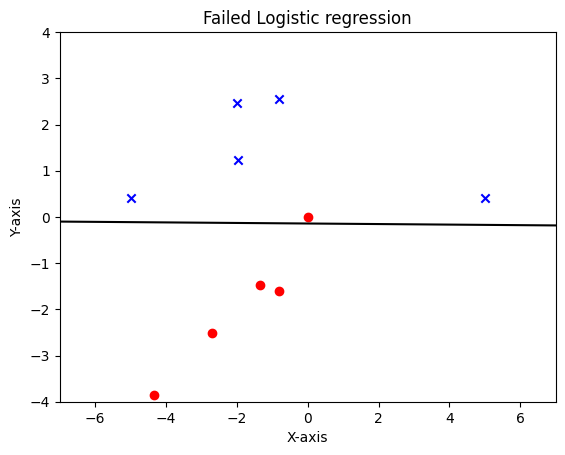

In [13]:
# your answer goes here
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

fail_X, fail_y = make_classification(n_samples = 10,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,random_state=4,flip_y=0,class_sep=2,shuffle=False)

#tweek the datapoints so the opposing classes are near the boundary.
fail_X[0] = [0,0]
fail_X[5] = [-5,.4]
fail_X[6] = [5,.4]

failed_logreg = LogisticRegression()
failed_logreg.fit(fail_X,fail_y)

fail_b = failed_logreg.intercept_[0]
fail_w1 = failed_logreg.coef_[0,0]
fail_w2 = failed_logreg.coef_[0,1]

#plot points
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
for i in range(len(fail_X)):
    label = fail_y[i]
    if(label == 0):
        plt.scatter(fail_X[i,0], fail_X[i,1],color='red',marker='o')
    else:
        plt.scatter(fail_X[i,0], fail_X[i,1],color='blue',marker='x')
        
# plot decision boundary
x_values = np.linspace(-15, 15,15)
y_values = (-fail_w1 * x_values - fail_b) / fail_w2
plt.title("Failed Logistic regression")
plt.plot(x_values, y_values, color='black')
plt.xlim(-7,7)
plt.ylim(-4,4)
plt.show()


In [14]:
# Grader's area

# maxScore +=
# actualScore +=

-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 3. SVM and classification margin**  </font>

The Iris dataset defined in above cells is linearly separable.

<font color = 'blue'> **Q3-1.**  </font> Use a [linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) to learn a hyperplane $y=w_1x_1 +w_2x_2 +b$ that maximizes the margin for this Iris dataset. In your answer, specify a setting for the hyperparameter $C$ (it is denoted as $\gamma$ in the lecture slides) that reduces the amount of regularization, i.e. it incentivizes very small slacks.

<font color = 'blue'> **Q3-2.** </font> Extract the coefficients $w$ and the intercept $b$ from the learned SVC. Find the margin, $2/||w||_2$. Print out the coefficients, intercept, and the margin.
[Hint: Read the documentation in order to access the coefficients]

<font color = 'blue'> **Q3-3.** </font> Set $w = w/s$ and $b=b/s$ where $s=||w||_2$. This changes the numerical definition of the separation line, but the line is still the same. Print out new weights and intercept. Plot the decision with new weights and intercept.

<font color = 'blue'> **Q3-4.** </font> With the new $w$ and $b$, calculate $wx^T + b$ for each point $x$ in our dataset. This will give a range of values, let $\beta$ be the smallest one in absolute value. This $\beta$ is the margin/2 (in fact there should be two points $x_1$ and $x_2$ of different labels, that give $wx_1^T + b = \beta$ and $wx_2^T + b = -\beta$). Write out calculation and print out margin.


**Note:** as with anything else, feel free to discuss this on Canvas.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


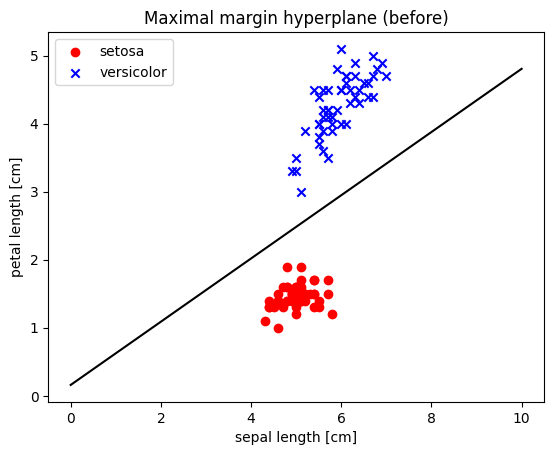

Coefficients: -0.6440545635485247, 1.3857787788799358
Intercept: -0.22156055032355565
Margin: 1.3087869856650496


New weights: -0.42146511541524645, 0.9068446154044323
New intercept: -0.14498778240012797


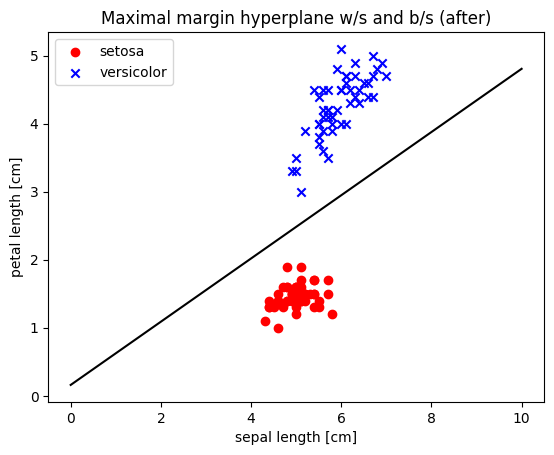

Margin: 0.8521479503908238


In [15]:
# -------------------------------------- Q3-1 -------------------------------------------
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[:100, [0, 2]].values

from sklearn.svm import LinearSVC
# increasing parameter C reduces regularization 
# (less generalization) since C is inverse of 
# regularization strength.
lvc = LinearSVC(C=2)
lvc.fit(X[:100],y[:100])

# plot
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
w1 = lvc.coef_[0,0]
w2 = lvc.coef_[0,1]
b = lvc.intercept_[0]
x = np.linspace(0, 10,10)
y = (-w1 * x - b) / w2
plt.plot(x,y, color="black") 
plt.title("Maximal margin hyperplane (before)")
plt.show()

# -------------------------------------- Q3-2 -------------------------------------------
w1 = lvc.coef_[0,0]
w2 = lvc.coef_[0,1]
b = lvc.intercept_[0]

mag_of_w_vecs = np.sqrt((w1**2)+(w2**2))
#margin = 2/||w||
margin = 2 / mag_of_w_vecs

print(f"Coefficients: {w1}, {w2}")
print(f"Intercept: {b}")
print(f"Margin: {margin}")
# -------------------------------------- Q3-3 -------------------------------------------
w1 = w1 / mag_of_w_vecs
w2 = w2 / mag_of_w_vecs
b = b / mag_of_w_vecs

print('\n')
print(f"New weights: {w1}, {w2}")
print(f"New intercept: {b}")

# plot
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
x_space = np.linspace(0, 10,10)
y_space = (-w1 * x - b) / w2
plt.plot(x_space,y_space, color="black")
plt.title("Maximal margin hyperplane w/s and b/s (after)")
plt.show()

# -------------------------------------- Q3-4 -------------------------------------------
transformations = []
for i in range(len(X)):
    transform =  (X[i,0] * w1) + (X[i,1] * w2) + b
    transformations.append(transform)
    
transformations = np.array(transformations)
trans_abs = np.abs(transformations)
squigglyB = np.min(trans_abs)

transform_margin = squigglyB*2

print(f"Margin: {transform_margin}")
# ---------------------------------------------------------------------------------------

In [16]:
# Grader's area

# maxScore +=
# actualScore +=


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 4. Upper bound for perceptron errors before convergence**  </font>

In this problem we will use $\beta$ calculated in question 3. If you have not been able to calculate it, you can 'borrow' its value from someone else that has calculated it (I expect that this can be done on Canvas).

<font color = 'blue'> **Q4-1.** </font> Calculate $R = \max_{x\in X} ||x||_2$. In other words, find the 2-norm of all points in the dataset, and let $R$ be the maximum norm.

<font color = 'blue'> **Q4-2.** </font> Calculate $maxErrors = R/\beta^2$. This is the maximum number of errors that a perceptron can do, in the worst case, before it convergences.

<font color = 'blue'> **Q4-3.** </font> Compare $maxError$ with the actual number of errors that the perceptron does with a random initialization. [Hint: Re-use the code from assignment 2, or anything else that can provide you with that number].  




In [17]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # learning rate
        self.n_iter = n_iter
        self.random_state = random_state

        # -=-=--=-=--==--=-=-=-=-=-==- MY CODE -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
        self.iters_passed = 0
        # keep track of weights
        self.weights_history = []
        # -=-=--=-=--==--=-=-=-=-=-==--=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            
            # xi (array) is a row representing an entry (with all its columns / features)
            # target (int) is the target value for the given entry. 
            for xi, target in zip(X, y):
                
                #  self.predict is an ndarray of 1 and -1. depending on prediction.

                # calculates weights for each row and its features
                # target - self.predict(xi) is the error for the current entry
                update = self.eta * (target - self.predict(xi))

                # Update weights to each column if needed 
                self.w_[1:] += update * xi

                #update bias 
                self.w_[0] += update

                # add to error if update doesnt equal 0 .
                # error will be zero if there is no update to be done.
                errors += int(update != 0.0)

                # -=-=--=-=--==--=-=-=-=-=-==- MY CODE -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
                # check if need to iterate more by checking if the weights predict correctly for given data.
                ##if(self.predict(xi) == target): return
                # -=-=--=-=--==--=-=-=-=-=-==--=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

                
                
            self.errors_.append(errors)

            # -=-=--=-=--==--=-=-=-=-=-==- MY CODE -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

            # Check the previous weight, if it is the same to current weight, then stop iterating.
            if(self.weights_history and self.w_.tolist() == self.weights_history[-1]): break;
            
            # Keep track of number of iterations
            self.iters_passed += 1 
            
            # Keep track of history of weights
            self.weights_history.append(self.w_.tolist())
            # -=-=--=-=--==--=-=-=-=-=-==--=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
            
            LW = 2020
            

        # -=-=--=-=--==--=-=-=-=-=-==- MY CODE -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
        # print number of iterations
        """
        print(f"Number of iterations passed: {self.iters_passed}")
        print('\n')
        
        # print history of weights
        
        print("Weight number \t\t   Bias \t\t    w1 \t\t      w2")
        [print(f"Weight {i}:\t{w}") for i,w in enumerate(self.weights_history)]
        """
        # -=-=--=-=--==--=-=-=-=-=-==--=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
        return self

    # Returns the dot product of the weighted sums, the input, and bias (aka z)
    # this is the predicted value
    def net_input(self, X):
        """Calculate net input"""
        # dot(X, self.w_[1:]) is the dot prod of all inputs with weights
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Converts predicted value to either 1 or -1
    def predict(self, X):
        """Return class label after unit step"""
        # returns array where if z greater than or equal to zero, assigns 1, else 0
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [22]:
# your answers go here
#----------------- Q4-1 ----------------------

twonorms = []
for i in range(len(X)):
    twonorms.append(np.sqrt(np.sum(np.square(X[i]))))  
    
R = np.max(twonorms)
print(f"R: {R}")
#----------------- Q4-2 ----------------------
maxErrors = R / (squigglyB**2)
print(f"Max errors: \t{maxErrors}")
#----------------- Q4-3 ----------------------
import random
perceptron = Perceptron(random_state=random.randint(1, 1000000))
perceptron.fit(X,y)
print(f"Errors the perceptron made: \t{np.sum(perceptron.errors_)}")
#---------------------------------------------

R: 8.462860036654275
Max errors: 	46.617302778497674
Errors the perceptron made: 	5


In [19]:
# Grader's area

# maxScore +=
# actualScore +=

----------------------------
----------------------------
----------------------------

In [20]:
# Grader's area

# score = actualScore*100/maxScore